In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


class AutoEncoder(tf.keras.Model):
    def __init__(self, input_shape=(28, 28, 1)):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=input_shape),
                tf.keras.layers.Conv2D(
                    16, (3, 3), activation="relu", padding="same", strides=2
                ),
                tf.keras.layers.Conv2D(
                    8, (3, 3), activation="relu", padding="same", strides=2
                ),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2DTranspose(
                    8, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2DTranspose(
                    16, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2D(
                    1, kernel_size=(3, 3), activation="sigmoid", padding="same"
                ),
            ]
        )

    def decode(self, x):
        return self.decoder(x)

    def encode(self, x):
        return self.encoder(x)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
def plot_reconstructed_images_and_encodings(original, encodings, reconstructed):
    n = original.shape[0]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original Images", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encodings[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Encodings", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed Images", loc="left", fontsize=20)
    plt.show()

In [10]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
fashion_mnist = tf.keras.datasets.fashion_mnist  # 28x28 images of clothing items

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0

In [11]:
model1 = AutoEncoder()
model1.compile(optimizer="adam", loss="mse")
model1.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 7216.8213 - val_loss: 7342.7988
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 7216.5776 - val_loss: 7342.7837
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 7216.5669 - val_loss: 7342.7769
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 7216.5557 - val_loss: 7342.7725
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 7216.5562 - val_loss: 7342.7661
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 7216.5532 - val_loss: 7342.7632
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 7216.5469 - val_loss: 7342.7632
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 7216.5483 - val_loss: 7342.7598
Epoch 9/10
1186/1875 [=================>............] - ETA: 4s - loss: 7238.6216

In [ ]:
tf.reshape(model1.encode(x_test[:10]), (10, 14, -1))

<tf.Tensor: shape=(10, 14, 28), dtype=float32, numpy=
array([[[  6.089097 ,   3.810285 ,  18.835325 , ...,   3.810285 ,
          18.835325 ,  17.93816  ],
        [ 10.397479 ,   5.6709595,   5.129558 , ...,   3.0193617,
           6.0712147,   5.91554  ],
        [  3.905484 ,  11.26548  ,  23.576508 , ...,   3.7111597,
          35.48426  ,   0.       ],
        ...,
        [ 37.116566 ,  44.76358  ,   0.       , ...,   3.0193617,
           6.0712147,   5.91554  ],
        [  5.877215 ,   0.3836285,  11.41289  , ...,   0.5832876,
          19.517893 ,  19.354723 ],
        [ 21.70333  ,   9.23238  ,   4.658797 , ...,   1.9934461,
           8.864996 ,   4.084282 ]],

       [[  6.089097 ,   3.810285 ,  18.835325 , ...,  20.421967 ,
          48.64256  ,   0.       ],
        [ 40.19647  ,  20.822723 ,   0.       , ...,   3.0193617,
           6.0712147,   5.91554  ],
        [  6.089097 ,   3.810285 ,  18.835325 , ...,  78.9017   ,
          38.865948 ,  13.36388  ],
        ...,


In [ ]:
model1.summary()

1/1 [==============================] - 0s 151ms/step


ValueError: num must be an integer with 1 <= num <= 20, not 21

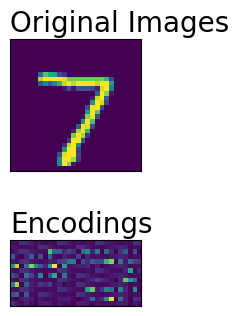

In [ ]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model1.encode(x_test[:10]), (10, 14, -1)),
    model1.predict(x_test[:10]),
)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
model2 = AutoEncoder(input_shape=(28, 28, 1))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

In [ ]:
model2.summary()

In [ ]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model2.encode(x_test[:10]), (10, 14, -1)),
    model2.predict(x_test[:10]),
)